In [62]:
#import required libraries, modules and classes
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [63]:
#data preprocessing

#import panel data
dataset = pd.read_csv('Assignment_Data.csv')
print(dataset.shape)
dataset.head(5)

(1167, 7)


,DATE,Open,High,Low,Close,Adj Close,Volume
0,1,9646.700195,9647.049805,9598.500000,9616.400391,9616.400391,141400.0
1,2,9615.549805,9654.150391,9595.400391,9606.900391,9606.900391,129700.0
2,3,9621.549805,9627.400391,9580.450195,9618.150391,9618.150391,181800.0
3,4,9617.900391,9621.400391,9560.799805,9578.049805,9578.049805,171100.0
4,5,9595.450195,9615.849609,9565.500000,9588.049805,9588.049805,213200.0


In [64]:
#check for null values and missing data
print(dataset.isna().sum())

DATE         0
Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64


In [65]:
#since there are only 4 nulls for each column, we can fill them with the mean values of each of the corresponding columns
dataset['Open'].fillna(dataset['Open'].mean(),inplace=True) 
dataset['High'].fillna(value=dataset['High'].mean(),inplace=True) 
dataset['Low'].fillna(value=dataset['Low'].mean(),inplace=True) 
dataset['Close'].fillna(value=dataset['Close'].mean(),inplace=True) 
dataset['Volume'].fillna(value=dataset['Volume'].mean(),inplace=True) 
dataset.drop(columns="Adj Close",axis=1, inplace=True)

In [66]:
#create independant and dependant variables
x = dataset[['Open','High','Low',"Volume"]]
y = dataset['Close']

#split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

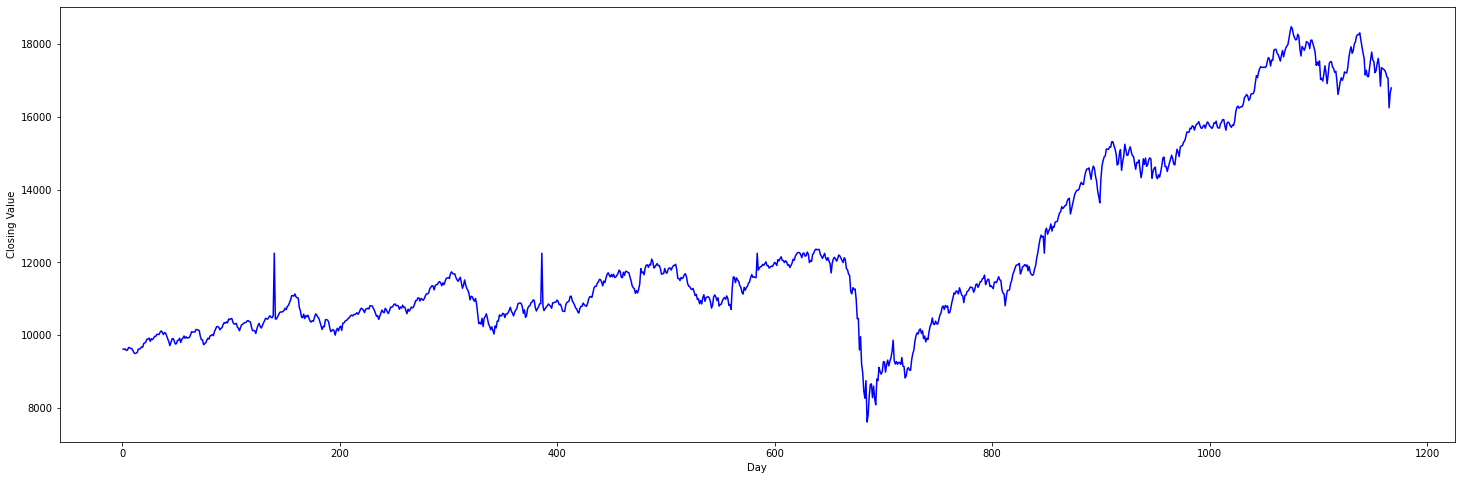

In [67]:
#visualizing the time-series of the NSE data from the last 1167 days

x = dataset['DATE']
y1 = dataset['Close'].head(1167)
plt.figure(figsize=(25,8))
plt.xlabel("Day")
plt.ylabel("Closing Value")
plt.plot(x,y1,color='blue')
plt.show()

In [68]:
#multiple linear regression

lr = LinearRegression()
lr.fit(x_train,y_train)
r2_score_lr = lr.score(x_test,y_test)*100
print(r2_score_lr,'%')

99.97513781247856 %


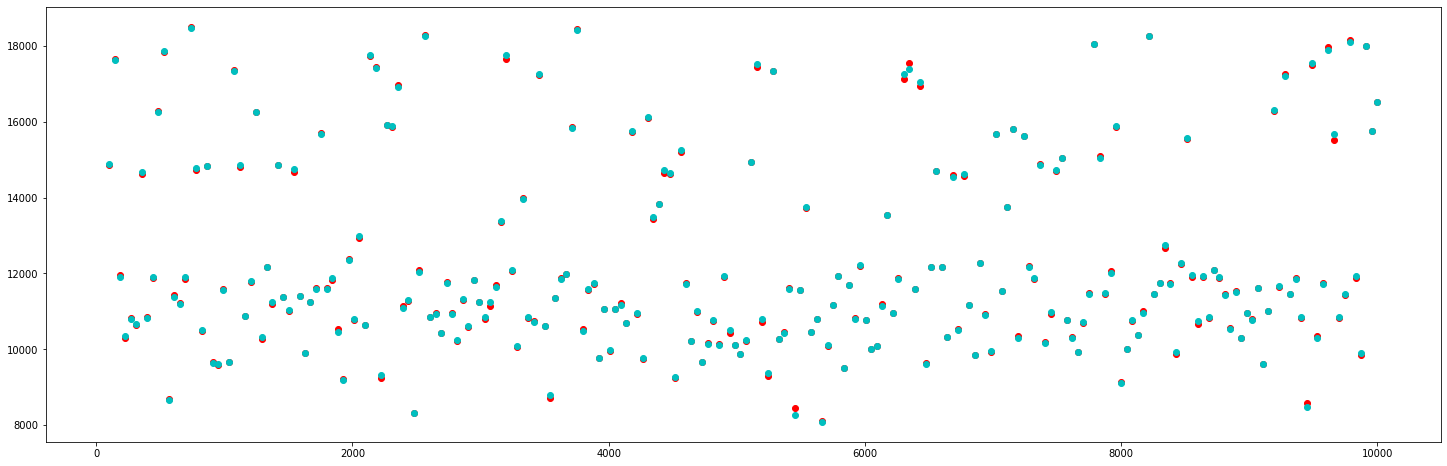

In [69]:
#visualize the regression model results

#predict values from Regression model
#x_test values are new to the model, since the model was trained on x_train
y_pred = lr.predict(x_test)

#comapre against actual values from test set using a scatter plot
y_actual = y_test
xx = np.linspace(100,10000,234)
plt.figure(figsize=(25,8))
plt.scatter(xx,y_pred,color='r')
plt.scatter(xx,y_test,color='c')
plt.show()

In [70]:
#random forest algorithm

#use 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(x_train,y_train)

y_pred = rf.predict(x_test)
r2_score_rf = rf.score(x_test,y_test)*100
print(r2_score_rf,'%')



99.92472218608567 %


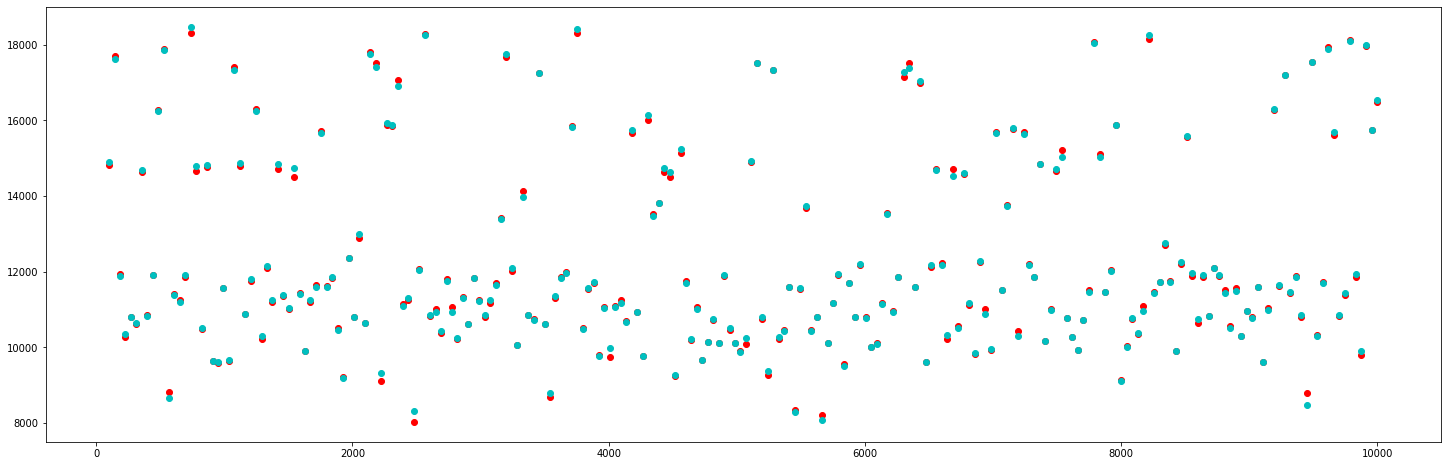

In [71]:
y_pred = rf.predict(x_test)

#compare against actual values from test set using a scatter plot
y_actual = y_test
xx = np.linspace(100,10000,234)
plt.figure(figsize=(25,8))
plt.scatter(xx,y_pred,color='r')
plt.scatter(xx,y_test,color='c')
plt.show()

#the multiple regression model is performing better than random forest which has r^2 score of: 99.9247%

In [72]:
#decision tree regressor

dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)

y_pred = dtr.predict(x_test)
r2_score_dtr = dtr.score(x_test,y_test)*100
print(r2_score_dtr)

99.90655069878277


In [73]:
#support vector regression

svr = SVR(kernel="rbf")
svr.fit(x_train,y_train)
r2_score_SVR_rbf = svr.score(x_train,y_train)*100

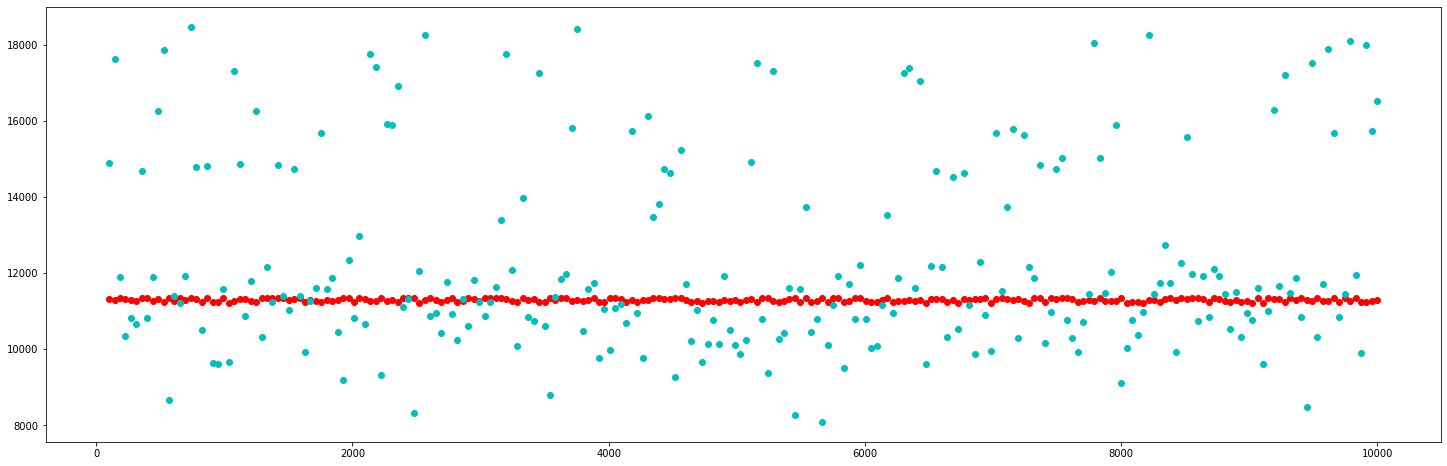

In [74]:
#visualizing SVR results
y_pred = svr.predict(x_test)

#compare against actual values from test set using a scatter plot
y_actual = y_test
xx = np.linspace(100,10000,234)
plt.figure(figsize=(25,8))
plt.scatter(xx,y_pred,color='r')
plt.scatter(xx,y_test,color='c')
plt.show()

#svr model is incorrect for this dataset, as the accuracy is very low
#different kinds of svr kernels used: rbf, linear, poly and sigmoid.

In [77]:
results = pd.DataFrame({
    'Model': ['SVR','Random Forest','Linear Regression','Decision Tree Regression'],
    'Score': [r2_score_SVR_rbf,r2_score_rf,r2_score_lr,r2_score_dtr]
})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
99.975138,Linear Regression
99.924722,Random Forest
99.906551,Decision Tree Regression
-14.118153,SVR


[-7.07183666e-01  9.43436854e-01  7.64627664e-01 -4.02099961e-06] -11.756673372827208
[-837.74719553 1090.17757156  881.3284379   -11.7613699 ]


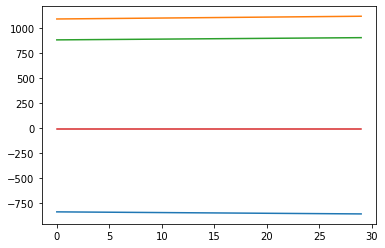

In [82]:
'''Hence, The Multiple Linear Regression model has the best R^2 score among all the models we have created.
We will use this model to predict new values of closing for 30 days.'''
prices_ = []
daysArr = []
for i in range(1168,1199):
    daysArr.append(i)

m = lr.coef_
c = lr.intercept_
print(m,c)
for i in range(0,30):
    forecast = m*daysArr[i] + c
    prices_.append(forecast)

print(prices_[0])
plt.plot(prices_)
plt.show()
